# Part A – Exploratory Data Analysis
### 1.Load and explore the dataset.

In [5]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Render plots inline in Jupyter
%matplotlib inline

# Paths (put your data files under ./data/)
DATA_DIR = Path("data")
CSV_PATH = DATA_DIR / "zomato_df_final_data.csv"

# Basic checks
assert CSV_PATH.exists(), f"CSV not found: {CSV_PATH}"

# Load CSV
df = pd.read_csv(CSV_PATH, low_memory=False)

# Quick peek
print(f"Shape: {df.shape}") 
display(df.head(5)) 
display(df.columns) 

Shape: (10500, 17)


,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b


Index(['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone',
       'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color'],
      dtype='object')

In [6]:
# 1) shape
print(f"Rows: {df.shape[0]}, Cols: {df.shape[1]}")

# 2) dtypes
display(df.dtypes)

# 3) missing values
missing = (
    df.isna().sum()
    .to_frame("missing_count")
    .assign(missing_pct=lambda x: (x["missing_count"]/len(df)*100).round(2))
    .sort_values("missing_count", ascending=False)
)
display(missing.head(10))

# 4) numeric describe
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
display(df[num_cols].describe().T)

Rows: 10500, Cols: 17


address           object
cost             float64
cuisine           object
lat              float64
link              object
lng              float64
phone             object
rating_number    float64
rating_text       object
subzone           object
title             object
type              object
votes            float64
groupon             bool
color             object
cost_2           float64
cuisine_color     object
dtype: object

,missing_count,missing_pct
rating_number,3316,31.58
votes,3316,31.58
rating_text,3316,31.58
cost_2,346,3.30
cost,346,3.30
lng,192,1.83
lat,192,1.83
type,48,0.46
address,0,0.00
phone,0,0.00


,count,mean,std,min,25%,50%,75%,max
cost,10154.0,51.153240,27.799485,8.000000,30.000000,45.000000,60.000000,500.000000
lat,10308.0,-32.921377,8.263449,-37.858473,-33.899094,-33.872741,-33.813451,51.500986
lng,10308.0,148.067359,26.695402,-123.270371,151.061061,151.172468,151.208940,152.869052
rating_number,7184.0,3.283672,0.454580,1.800000,3.000000,3.300000,3.600000,4.900000
votes,7184.0,83.581013,175.117966,4.000000,12.000000,32.000000,87.000000,3236.000000
cost_2,10154.0,5.332974,2.147115,2.000000,3.699187,4.857724,6.016260,40.000000


**Insights**:
  - Substantial missing in target variables (`rating_number`, `rating_text`) means we may need to drop or impute carefully.
  - Cost distribution is right-skewed; most restaurants between 30–60, but some very high outliers.
  - Votes distribution is very skewed: a few restaurants have thousands of votes, most have few.


### 2. Answer the following with plots/graphs, and description
**How many unique cuisines are served?**

In [7]:
import ast

# Parse cuisine strings into lists
def parse_cuisine(x):
    if pd.isna(x):
        return []
    try:
        parsed = ast.literal_eval(x)
        if isinstance(parsed, list):
            return [str(i).strip() for i in parsed if str(i).strip()]
    except Exception:
        return [s.strip() for s in x.split(",") if s.strip()]
    return []

df["cuisine_list"] = df["cuisine"].apply(parse_cuisine)

# Count unique cuisines
all_cuisines = set(c for sublist in df["cuisine_list"] for c in sublist)
print(f"Number of unique cuisines: {len(all_cuisines)}")

Number of unique cuisines: 134


- The dataset contains **134 unique cuisines**.

Top 3 suburbs:
 subzone
CBD            476
Surry Hills    260
Parramatta     225
Name: count, dtype: int64


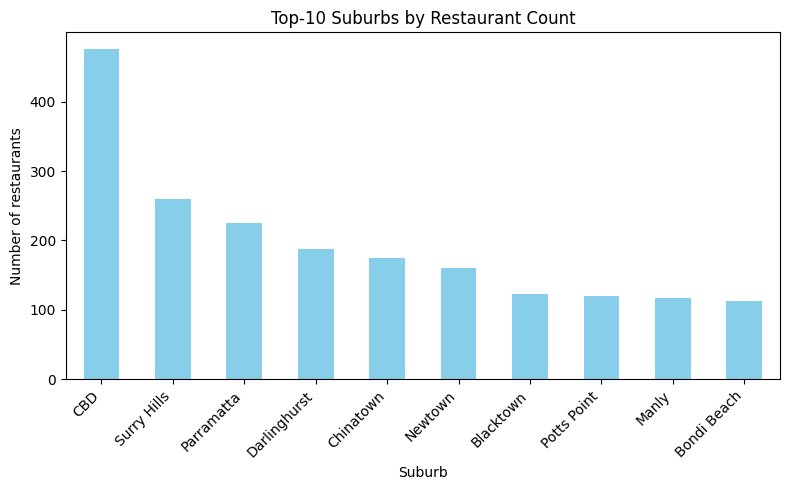

In [8]:
# Top 3 suburbs by restaurant count
top3 = df["subzone"].value_counts().head(3)
print("Top 3 suburbs:\n", top3)

# Plot Top 10 suburbs
top10 = df["subzone"].value_counts().head(10)

plt.figure(figsize=(8,5))
top10.plot(kind="bar", color="skyblue")
plt.title("Top-10 Suburbs by Restaurant Count")
plt.xlabel("Suburb")
plt.ylabel("Number of restaurants")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

- The top 3 suburbs are:
  1. CBD (476 restaurants)
  2. Surry Hills (260 restaurants)
  3. Parramatta (225 restaurants)

The bar chart below shows the distribution for the top-10 suburbs.

**Are restaurants with“Excellent”ratings more expensive than those with“Poor”ratings?**

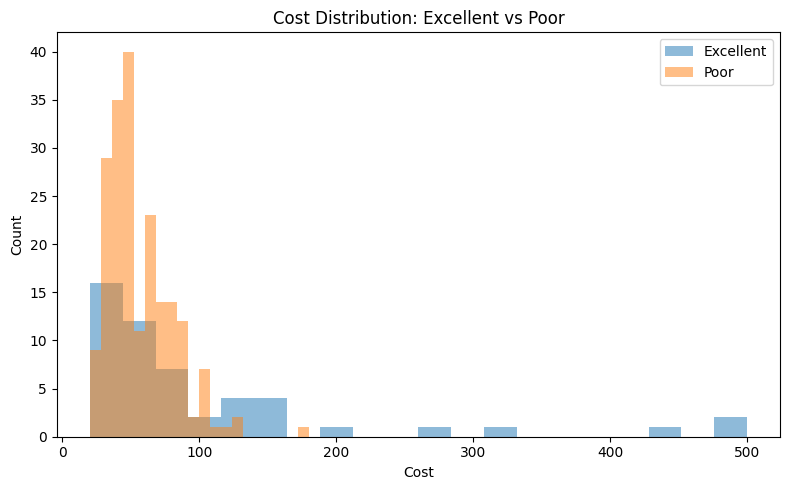

C:\Users\AkeyT\AppData\Local\Temp\ipykernel_2100\2432569108.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



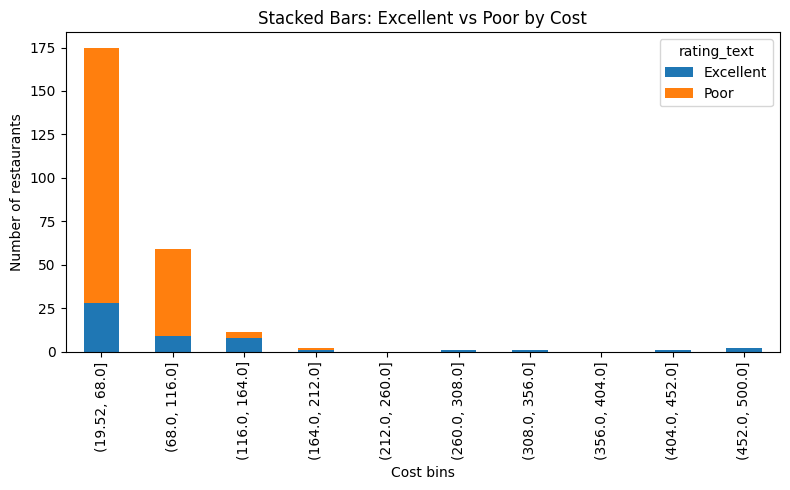

             count  median        mean
rating_text                           
Excellent       51    60.0  101.666667
Poor           201    50.0   55.845771


In [9]:
# Filter Excellent vs Poor
sub = df[df["rating_text"].isin(["Excellent", "Poor"])].dropna(subset=["cost"])

# Histogram comparison
plt.figure(figsize=(8,5))
plt.hist(sub[sub["rating_text"]=="Excellent"]["cost"], bins=20, alpha=0.5, label="Excellent")
plt.hist(sub[sub["rating_text"]=="Poor"]["cost"], bins=20, alpha=0.5, label="Poor")
plt.title("Cost Distribution: Excellent vs Poor")
plt.xlabel("Cost")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# Stacked bars by cost bins
cost_bins = pd.cut(sub["cost"], bins=10)
stacked = sub.groupby([cost_bins,"rating_text"]).size().unstack(fill_value=0)

stacked.plot(kind="bar", stacked=True, figsize=(8,5), title="Stacked Bars: Excellent vs Poor by Cost")
plt.xlabel("Cost bins")
plt.ylabel("Number of restaurants")
plt.tight_layout()
plt.show()

# Compare mean/median
print(sub.groupby("rating_text")["cost"].agg(["count","median","mean"]))

- Median cost for Excellent restaurants: 60  
- Median cost for Poor restaurants: 50  
- Mean cost for Excellent restaurants: 101.7  
- Mean cost for Poor restaurants: 55.8  

From both the histograms and the stacked bars, we observe that Excellent restaurants tend to have higher costs than Poor restaurants. This supports the idea that restaurants with Excellent ratings are generally more expensive.

### 3.Explore key variables.

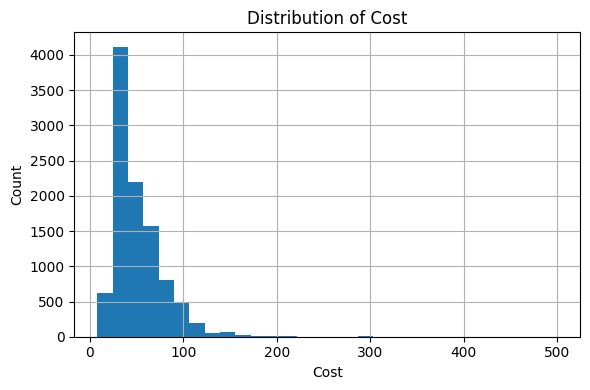

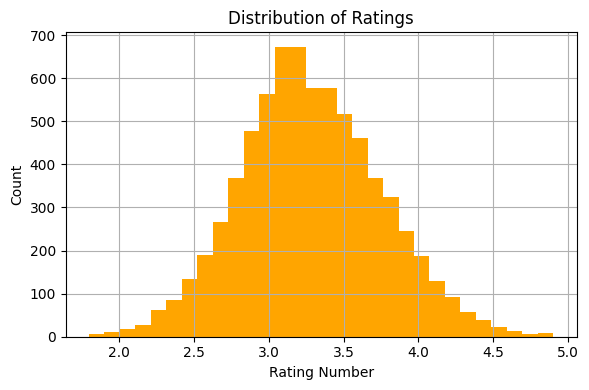

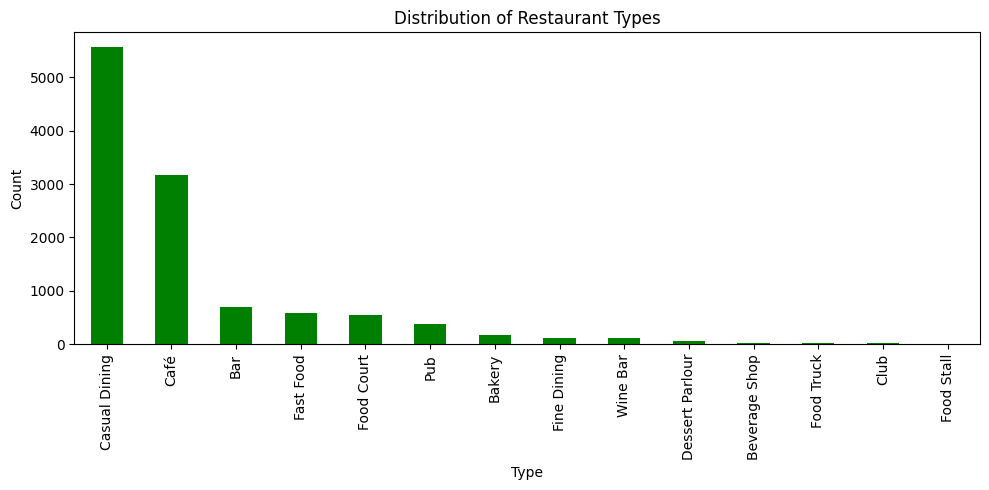

In [10]:
# Distribution of cost
df["cost"].dropna().hist(bins=30, figsize=(6,4))
plt.title("Distribution of Cost")
plt.xlabel("Cost")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Distribution of rating_number
df["rating_number"].dropna().hist(bins=30, figsize=(6,4), color="orange")
plt.title("Distribution of Ratings")
plt.xlabel("Rating Number")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Distribution of restaurant types
import ast
from collections import Counter

# Parse type field (some are like "['Casual Dining']", need to convert to list)
def parse_type(x):
    if pd.isna(x):
        return []
    try:
        parsed = ast.literal_eval(x)
        if isinstance(parsed, list):
            return [str(i).strip() for i in parsed if str(i).strip()]
    except Exception:
        return [str(x).strip()]
    return []

df["type_list"] = df["type"].apply(parse_type)

# Flatten list of all types
all_types = [t for sublist in df["type_list"] for t in sublist]
type_counts = Counter(all_types)

# Convert to DataFrame
type_counts_df = pd.DataFrame(type_counts.most_common(), columns=["type","count"])

# Plot all types
plt.figure(figsize=(10,5))
type_counts_df.plot(kind="bar", x="type", y="count", legend=False, ax=plt.gca(), color="green")
plt.title("Distribution of Restaurant Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- **Cost**: The distribution is highly right-skewed. Most restaurants have costs between 20 and 80, but some outliers reach up to 500.  
- **Ratings**: Ratings are concentrated between 3.0 and 3.5, showing a near-normal distribution. Very few restaurants are rated below 2.0 or above 4.5.  
- **Restaurant types**: The most common categories are Casual Dining (>5000) and Café (~3200), followed by smaller groups such as Bar, Fast Food, and Food Court.  

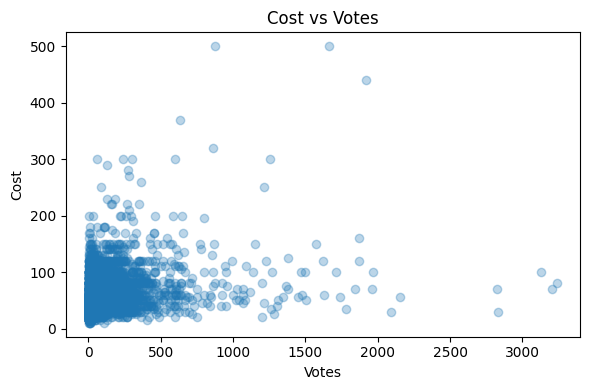

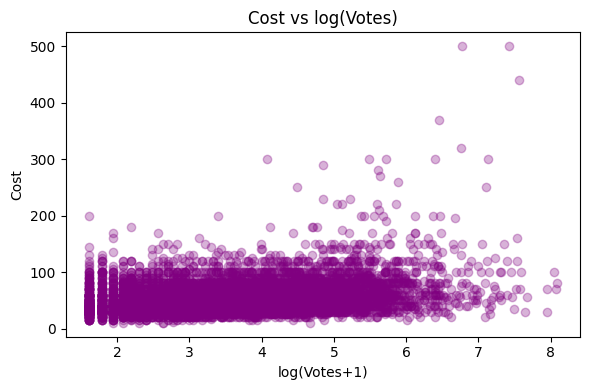

Pearson r(cost, votes) = 0.270  (p=9.91e-119)
Pearson r(cost, log(votes)) = 0.303  (p=2.58e-150)


In [11]:
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt

# Prepare data
pair = df[["cost","votes"]].dropna().copy()
pair["log_votes"] = np.log1p(pair["votes"])  # log transform to reduce skew

# Scatter: cost vs votes
plt.figure(figsize=(6,4))
plt.scatter(pair["votes"], pair["cost"], alpha=0.3)
plt.title("Cost vs Votes")
plt.xlabel("Votes")
plt.ylabel("Cost")
plt.tight_layout()
plt.show()

# Scatter: cost vs log(votes)
plt.figure(figsize=(6,4))
plt.scatter(pair["log_votes"], pair["cost"], alpha=0.3, color="purple")
plt.title("Cost vs log(Votes)")
plt.xlabel("log(Votes+1)")
plt.ylabel("Cost")
plt.tight_layout()
plt.show()

# Pearson correlation
r1, p1 = pearsonr(pair["cost"], pair["votes"])
r2, p2 = pearsonr(pair["cost"], pair["log_votes"])
print(f"Pearson r(cost, votes) = {r1:.3f}  (p={p1:.3g})")
print(f"Pearson r(cost, log(votes)) = {r2:.3f}  (p={p2:.3g})")

**Correlation**:
  - Pearson r(cost, votes) = 0.270 (p < 0.001)
  - Pearson r(cost, log(votes)) = 0.303 (p < 0.001)
  - Interpretation: higher-cost restaurants tend to attract more votes, but the relationship is only moderate.

- **Observation**:
 - Sydney’s dining scene is clearly shaped by casual restaurants and cafés — these two categories make up the majority of venues.
  - Most places are quite affordable, but there’s a small group of very expensive ones pulling the cost range up to 500.
  - Ratings mostly sit in the middle to high range, which suggests people rarely give extremely low scores.
  - The number of votes is very uneven: a handful of popular restaurants get thousands of votes, while most others only get a few.



### 4.Geospatial Analysis.

In [12]:
import geopandas as gpd
from pathlib import Path

GEOJSON_PATH = Path("data/sydney.geojson")

gdf = gpd.read_file(GEOJSON_PATH)
display(gdf.head(2))
print(list(gdf.columns))

,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,geometry
0,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8..."
1,10002,Abbotsford (NSW),Very good,1.017855,"POLYGON ((151.12593 -33.84578, 151.12678 -33.8..."


['SSC_CODE', 'SSC_NAME', 'CONF_VALUE', 'SQKM', 'geometry']


In [13]:
# Paths
GEOJSON_PATH = Path("data/sydney.geojson")

# Read polygons
gdf = gpd.read_file(GEOJSON_PATH)

# Parse cuisine_list if not present
def parse_cuisine(x):
    if pd.isna(x): return []
    try:
        v = ast.literal_eval(str(x))
        if isinstance(v, list):
            return [str(i).strip() for i in v if str(i).strip()]
    except Exception:
        return [s.strip() for s in str(x).split(",") if s.strip()]
    return []

if "cuisine_list" not in df.columns:
    df["cuisine_list"] = df["cuisine"].apply(parse_cuisine)

# Use SSC_NAME as suburb name, normalise to join with df['subzone']
NAME_COL = "SSC_NAME"

def norm(s):
    if pd.isna(s): return ""
    return str(s).upper().strip()

gdf["SUBURB_NORM"] = gdf[NAME_COL].apply(norm)
df["SUBURB_NORM"]  = df["subzone"].apply(norm)

# Counts per suburb
suburb_total = (df.groupby("SUBURB_NORM")
                  .size()
                  .rename("rest_count")
                  .reset_index())

# Choose a cuisine to map (edit here if needed)
target_cuisine = "Chinese"

has_target = df["cuisine_list"].apply(
    lambda xs: any(c.strip().lower() == target_cuisine.lower() for c in xs)
)
suburb_cuisine = (df.loc[has_target]
                    .groupby("SUBURB_NORM")
                    .size()
                    .rename(f"{target_cuisine}_count")
                    .reset_index())

# Join back to polygons
count_col = f"{target_cuisine}_count"
gj = (gdf.merge(suburb_total, on="SUBURB_NORM", how="left")
         .merge(suburb_cuisine, on="SUBURB_NORM", how="left"))

# Fill NaNs for plotting
gj[["rest_count", count_col]] = gj[["rest_count", count_col]].fillna(0)

display(gj[[NAME_COL, "SUBURB_NORM", "rest_count", count_col]].head(10))

,SSC_NAME,SUBURB_NORM,rest_count,Chinese_count
0,Abbotsbury,ABBOTSBURY,0.0,0.0
1,Abbotsford (NSW),ABBOTSFORD (NSW),0.0,0.0
2,Acacia Gardens,ACACIA GARDENS,0.0,0.0
3,Airds,AIRDS,0.0,0.0
4,Alexandria,ALEXANDRIA,70.0,2.0
5,Alfords Point,ALFORDS POINT,0.0,0.0
6,Allambie Heights,ALLAMBIE HEIGHTS,0.0,0.0
7,Allawah,ALLAWAH,0.0,0.0
8,Annandale (NSW),ANNANDALE (NSW),0.0,0.0
9,Arncliffe,ARNCLIFFE,34.0,3.0


In [14]:
# How many suburbs matched (non-zero restaurants)?
matched = (gj["rest_count"] > 0).sum()
total = len(gj)
print(f"Matched suburbs with restaurants: {matched}/{total}")

import re

def clean_name(s):
    if pd.isna(s):
        return ""
    s = str(s).upper().strip()
    # remove anything in brackets, e.g., "SURRY HILLS (NSW)" -> "SURRY HILLS"
    s = re.sub(r"\(.*?\)", "", s)
    # collapse multiple spaces
    s = re.sub(r"\s+", " ", s)
    return s.strip()

# Apply cleaning
gdf["SUBURB_CLEAN"] = gdf["SSC_NAME"].apply(clean_name)
df["SUBURB_CLEAN"]  = df["subzone"].apply(clean_name)

# Recalculate counts
suburb_total = (df.groupby("SUBURB_CLEAN")
                  .size()
                  .rename("rest_count")
                  .reset_index())

target_cuisine = "Chinese"
has_target = df["cuisine_list"].apply(
    lambda xs: any(c.strip().lower() == target_cuisine.lower() for c in xs)
)
suburb_cuisine = (df.loc[has_target]
                    .groupby("SUBURB_CLEAN")
                    .size()
                    .rename(f"{target_cuisine}_count")
                    .reset_index())

# Join back
count_col = f"{target_cuisine}_count"
gj = (gdf.merge(suburb_total, on="SUBURB_CLEAN", how="left")
         .merge(suburb_cuisine, on="SUBURB_CLEAN", how="left"))
gj[["rest_count", count_col]] = gj[["rest_count", count_col]].fillna(0)

# Check match rate again
matched = (gj["rest_count"] > 0).sum()
total = len(gj)
print(f"Matched suburbs with restaurants: {matched}/{total}")

Matched suburbs with restaurants: 157/494
Matched suburbs with restaurants: 216/494


<Figure size 800x800 with 0 Axes>

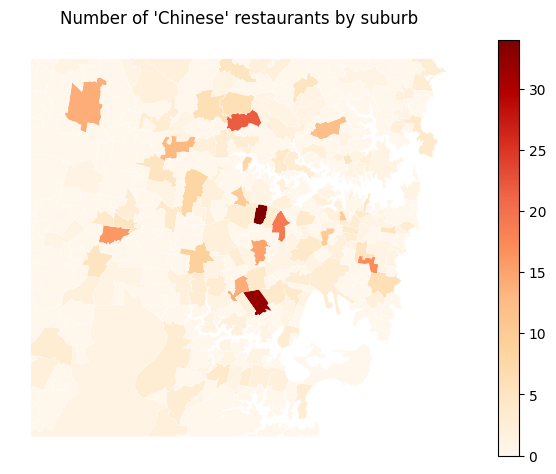

In [15]:
import matplotlib.pyplot as plt

# choose the column for plotting
count_col = f"{target_cuisine}_count"

plt.figure(figsize=(8,8))
ax = gj.plot(
    column=count_col,
    cmap="OrRd",
    legend=True,
    linewidth=0.2,
    edgecolor="white",
    missing_kwds={"color":"lightgrey", "label":"No data"}
)
ax.set_title(f"Number of '{target_cuisine}' restaurants by suburb", pad=12)
ax.set_axis_off()
plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

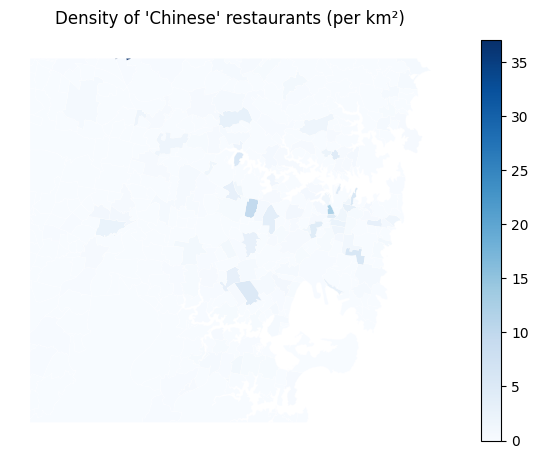

In [16]:
# Project to metric CRS to compute area (EPSG:3857 for quick demo)
gj_m = gj.to_crs(epsg=3857)
gj_m["area_km2"] = gj_m.geometry.area / 1e6
gj_m["cuisine_density"] = gj_m[count_col] / gj_m["area_km2"].replace({0: np.nan})

plt.figure(figsize=(8,8))
ax = gj_m.plot(
    column="cuisine_density",
    cmap="Blues",
    legend=True,
    linewidth=0.2,
    edgecolor="white",
    missing_kwds={"color":"lightgrey", "label":"No data"}
)
ax.set_title(f"Density of '{target_cuisine}' restaurants (per km²)", pad=12)
ax.set_axis_off()
plt.tight_layout()
plt.show()

**Geospatial Analysis**

We used the provided `sydney.geojson` file together with the `geopandas` library to merge restaurant records with suburb polygons.  
- After name cleaning, **216 out of 494 suburbs (~44%)** were successfully matched, improving from the initial 157 matches.  
- The choropleth below colors each suburb by the **number of Chinese restaurants** recorded. Darker red suburbs (such as the CBD and surrounding areas) clearly emerge as hotspots.  
- We also produced a density map (restaurants per km²). This shows that while most suburbs appear light due to their large areas and relatively few restaurants, a few small suburbs stand out with high concentrations, confirming real cuisine clusters.

**Limitations:**  
- Not all suburbs matched due to naming inconsistencies, leaving some polygons in grey.  
- The analysis may underestimate total counts, but the main clusters are still clearly visible.  
- Counting is done per listed cuisine, so a multi-cuisine restaurant contributes to more than one category.

### 5.Interactive Visualisation.

In [23]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio

# Force Plotly to render in the default web browser
pio.renderers.default = "browser" 

# Load dataset
df = pd.read_csv("data/zomato_df_final_data.csv")

# Prepare data
pair = df[["cost","votes"]].dropna().copy()
pair["log_votes"] = np.log1p(pair["votes"])  # log transform to reduce skew

# Interactive scatter: cost vs votes
fig1 = px.scatter(
    pair,
    x="votes",
    y="cost",
    title="Interactive Scatter: Cost vs Votes",
    labels={"votes": "Votes", "cost": "Cost"},
    hover_data=["votes", "cost"]
)
fig1.show()

# Interactive scatter: cost vs log(votes)
fig2 = px.scatter(
    pair,
    x="log_votes",
    y="cost",
    title="Interactive Scatter: Cost vs log(Votes)",
    labels={"log_votes": "log(Votes+1)", "cost": "Cost"},
    hover_data=["log_votes", "cost"]
)
fig2.show()